In [ ]:
!pip install langgraph --break-system-packages

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.2/471.2 kB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.3/208.3 kB 19.6 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.79
    Uninstalling langchain-core-0.3.79:
      Successfully uninstalled langchain-core-0.3.79
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain 0.3.27 requires langchain-core<1.0.0,>=0.3.72, but you have langchain-core 1.0.4 which is incompatible.


# Hello World Graph

In [ ]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph ## helps to design and manage the flow of tasks in the application

In [ ]:
# AgentState - shared data strucute that keeps trac of information as the application run
class AgentState(TypedDict):
  message: str

def greeting_node(state: AgentState)->AgentState:
  '''simple node that adds a greeting message to the state'''

  state['message']="Hey " + state['message'] + ", How you doing today?"

  return state


In [ ]:
graph = StateGraph(AgentState)
graph.add_node("greeter", greeting_node)

graph.set_entry_point("greeter")
graph.set_finish_point("greeter")
app = graph.compile()

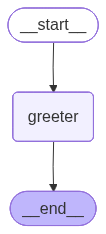

In [ ]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
result = app.invoke({"message":" Bob"})

In [ ]:
result['message']

'Hey Bob, How you doing today?'

# Personalized Compliment Agent

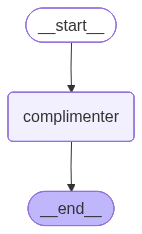

"Noor you're doing an amazing job learning LangGraph"

In [ ]:
from typing import TypedDict, Dict

class AgentState(TypedDict):
  name: str
  compliment:str


def complimenter(state:AgentState):

  state['compliment']=state['name'] + " you're doing an amazing job learning LangGraph"

  return state

graph = StateGraph(AgentState)

graph.add_node("complimenter", complimenter)
graph.set_entry_point("complimenter")
graph.set_finish_point("complimenter")
app_2 = graph.compile()

from IPython.display import  Image, display

display(Image(app_2.get_graph().draw_mermaid_png()))


output=app_2.invoke({"name":"Noor"})
output['compliment']


# Mathmatical operation Agent


In [ ]:
from typing import TypedDict
from langgraph.graph import StateGraph

class AgentState(TypedDict):
    values: list[int]
    name: str
    result: str

def process_values(state: AgentState) -> AgentState:
    '''This function handles multiple different inputs'''

    state['result'] = f"Hi there {state['name']}! Your sum is {sum(state['values'])}"
    return state

graph = StateGraph(AgentState)
graph.add_node("processor", process_values)
graph.set_entry_point("processor")
graph.set_finish_point("processor")

app_3 = graph.compile()

output = app_3.invoke({"values": [1, 2, 3, 4], "name": "Noor"})
print(output['result'])


Hi there Noor! Your sum is 10


In [ ]:
from ast import Mult
from typing import List, TypedDict
from langgraph.graph import StateGraph
import math

class AgentState(TypedDict):
  operation: str
  values: list[int]
  name : str
  result: str

def process_values_according_passed_operation(state:AgentState)->AgentState:

  if state['operation'] == '+':
    state['result'] = f"Hi {state['name']}, yout answer is {sum(state['values'])}"


  elif state['operation'] == '*':
    state['result'] = f"Hi {state['name']}, yout answer is {math.prod(state['values'])}"

  return state


graph = StateGraph(AgentState)
graph.add_node("calculator",process_values_according_passed_operation)
graph.set_entry_point("calculator")
graph.set_finish_point("calculator")
app_4 = graph.compile()
output = app_4.invoke({"name":"Noor","values":[3,4,5], "operation":"*"})
print(output['result'])


Hi Noor, yout answer is 60


# Sequential Graph

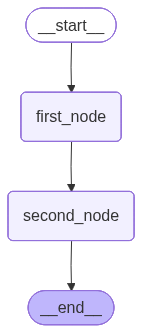

{'name': 'charli', 'age': 10, 'final': 'Hi charli! You are 10 years old!'}

In [ ]:
from typing import TypedDict
from langgraph.graph import StateGraph

class AgentState(TypedDict):
  name: str
  age: str
  final : str

def first_node(state:AgentState)->AgentState:
  '''This is the first node of our sequence'''

  state['final'] = f"Hi {state['name']}!"
  return state


def second_node(state:AgentState)->AgentState:
    '''This is the second node of our sequence'''

    state['final'] = state['final']  + f" You are {state['age']} years old!"
    return state


graph = StateGraph(AgentState)

graph.add_node("first_node", first_node)
graph.add_node("second_node", second_node)
graph.add_edge("first_node", "second_node")
graph.set_entry_point("first_node")
graph.set_finish_point("second_node")
app_4 = graph.compile()

from IPython.display import display, Image

display(Image(app_4.get_graph().draw_mermaid_png()))

app_4.invoke({"name":"charli","age":10})





In [ ]:
from typing import TypedDict, List
from langgraph.graph import StateGraph


class AgentState(TypedDict):
  name: str
  age: str
  skills : List[str]
  result : str


def first_node(state:AgentState)->AgentState:
  ''' personalize the name with greeting '''

  state['result'] = f"Hello {state['name']}!"

  return state


def second_node(state:AgentState)->AgentState:

  state['result'] = state['result'] + f" Your Age is {state['age']}"

  return state

def third_node(state:AgentState)->AgentState:

  state['result'] = state['result'] + f", Your skills are {state['skills']}"

  return state


graph = StateGraph(AgentState)

graph.add_node("first_node",first_node)
graph.add_node("second_node",second_node)
graph.add_node("third_node",third_node)
graph.add_edge("first_node","second_node")
graph.add_edge("second_node", "third_node")
graph.set_entry_point("first_node")
graph.set_finish_point("third_node")
app_5 = graph.compile()

app_5.invoke({"name":"sara", "age":30, "skills":["Python","AI"]})


{'name': 'sara',
 'age': 30,
 'skills': ['Python', 'AI'],
 'result': "Hello sara! Your Age is 30, Your skills are ['Python', 'AI']"}

# Conditional Graph

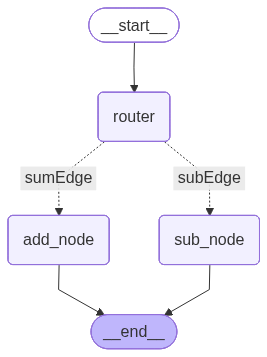

{'number1': 3, 'number2': 4, 'operation': '-', 'finalNumber': -1}

In [ ]:
from typing import TypedDict
from langgraph.graph import END, START, StateGraph


class AgentState(TypedDict):
  number1:int
  number2:int
  operation:str
  finalNumber:int


def adder(state:AgentState)->AgentState:
  '''This node is to adds two numbers'''
  state['finalNumber'] = state['number1'] + state['number2']

  return state


def subtractor(state:AgentState)->AgentState:
  '''This node is to subtract two numbers'''
  state['finalNumber'] = state['number1'] - state['number2']
  return state


def decide_next_node(state:AgentState)->AgentState:
  '''This node will select the next node of the graph'''

  if state['operation'] == '+':
    return 'sumEdge'

  if state['operation'] == '-':
    return 'subEdge'


graph = StateGraph(AgentState)

graph.add_node("sub_node", subtractor)
graph.add_node("add_node", adder)
graph.add_node("router", lambda state:state)

graph.add_edge(START,"router")
graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
      "sumEdge":"add_node",
      "subEdge":"sub_node"
    }
    )

graph.add_edge("add_node", END)
graph.add_edge("sub_node", END)

app_6 = graph.compile()
from IPython.display import Image, display

display(Image(app_6.get_graph().draw_mermaid_png()))

# app_6.invoke({"number1":3,"number2":4,"operation":"+"})
app_6.invoke({"number1":3,"number2":4,"operation":"-"})

In [ ]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END


class AgentState(TypedDict):
  number1:int
  number2:int
  operation:str
  number3:int
  number4:int
  operation2:str
  finalNumber:int
  finalNumber2:int


def addition_1(state:AgentState)->AgentState:

  state['finalNumber'] = state['number1'] + state['number2']

  return state

def subtractor_1(state:AgentState)->AgentState:

    state['finalNumber2'] = state['number1'] - state['number2']

    return state




def addition_2(state:AgentState)->AgentState:

  state['finalNumber'] = state['finalNumber'] + state['number3'] + state['number4']

  return state

def subtractor_2(state:AgentState)->AgentState:

    state['finalNumber2'] = state['finalNumber2'] - state['number3'] - state['number4']

    return state


def decide_next_node_1(state:AgentState)->AgentState:

  if state['operation'] == '+':
    return "addition_operation"

  elif state['operation'] == '-':
    return "subtraction_operation"

def decide_next_node_2(state:AgentState):

  if state['operation2'] == '+':
    return "addition_operation2"


  elif state['operation2'] == '-':
    return "subtraction_operation2"



graph = StateGraph(AgentState)

graph.add_node("add_node",addition_1)
graph.add_node("subtract_node",subtractor_1)
graph.add_node("router", lambda state:state)
graph.add_edge(START,"router")
graph.add_conditional_edges(
    "router",
    decide_next_node_1,
    {
        "addition_operation":"add_node",
        "subtraction_operation":"subtract_node"
    }
)


graph.add_node("router_2", lambda state:state)

graph.add_edge("add_node", "router_2")
graph.add_edge("subtract_node", "router_2")

graph.add_node("add_node2",addition_2)
graph.add_node("subtract_node2",subtractor_2)

graph.add_conditional_edges(
    "router_2",
    decide_next_node_2,
    {
        "addition_operation2":"add_node2",
        "subtraction_operation2":"subtract_node2"
    }

)


graph.add_edge("add_node2",END)
graph.add_edge("subtract_node2",END)

app_7 = graph.compile()

app_7.invoke({
    "number1":10,
    "operation":"-",
    "number2":5,
    "number3":7,
    "number4":4,
    "operation2":"+",
    "finalNumber":0,
    "finalNumber2":0
})

{'number1': 10,
 'number2': 5,
 'operation': '-',
 'number3': 7,
 'number4': 4,
 'operation2': '+',
 'finalNumber': 11,
 'finalNumber2': 5}

# Looping Graph

In [ ]:
from typing import TypedDict
from langgraph.graph import START, StateGraph, END
import random

class AgentState:
  name:str
  guesses:list[int]
  attempts:int
  lower_bound:int
  upper_bound:int



def initialize_state(state:AgentState)->AgentState:
  state['name'] = f"Your name is {state['name']}"
  return state


def guess(state:AgentState)->AgentState:
   state[]





# Agents

# Simple Bot

In [ ]:
# Install the required package
!pip install langchain-openai --break-system-packages

# Then run your code
from typing import TypedDict, List
from langchain_core.messages import HumanMessage
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, END, START

class AgentState(TypedDict):
    messages: List[HumanMessage]

llm = ChatOpenAI(model='gpt-4o')

def process(state: AgentState) -> AgentState:
    response = llm.invoke(state['messages'])
    print(f"AI: {response.content}")
    return state

graph = StateGraph(AgentState)
graph.add_node("process", process)
graph.add_edge(START, "process")
graph.add_edge("process", END)
agent = graph.compile()

user_input = input("Enter: ")

agent.invoke({"messages": [HumanMessage(user_input)]})

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.4 MB/s eta 0:00:00


OpenAIError: The api_key client option must be set either by passing api_key to the client or by setting the OPENAI_API_KEY environment variable

# Chatbot

In [ ]:
!pip install langchain-openai --break-system-packages

from typing import TypedDict, List, Union
from langchain_core.messages import HumanMessage, AIMessage
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, END, START


class AgentState(TypedDict):
    messages: List[Union[HumanMessage, AIMessage]]

llm  = ChatOpenAI(model="gpt-4o")

def process(state:AgentState):
  response = llm.invoke(state['messages'])
  state['messages'].append(AIMessage(content=response.content))
  print(f"AI {response.content}")
  return state


graph = StateGraph(AgentState)
graph.add_node("process", process)
graph.add_edge(START, "process")
graph.add_edge("process", END)
agent_2 = graph.compile()

conversation_history=[]
user_input = input("Enter:")
while user_input !="exit":
  conversation_history.append(HumanMessage(content=user_input))

  result = agent.invoke({"messages":conversation_history})
  print(result['messages'])
  conversation_history=result['messages']
  user_input = input("Enter:")


## save things in db
## take 5 msgs to save tokens

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.2/471.2 kB 18.1 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.79
    Uninstalling langchain-core-0.3.79:
      Successfully uninstalled langchain-core-0.3.79
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain 0.3.27 requires langchain-core<1.0.0,>=0.3.72, but you have langchain-core 1.0.4 which is incompatible.


ModuleNotFoundError: No module named 'langgraph'

# ReAct Agent
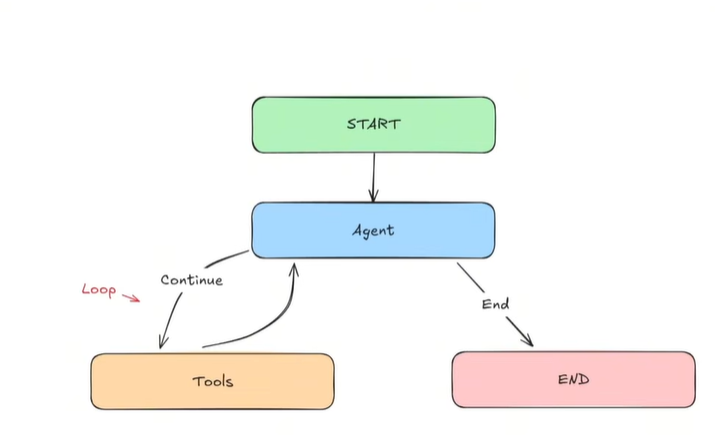

In [ ]:
from typing import Annotated, Sequence, TypedDict
from dotenv import load_dotenv
from langchain_core.messages import BaseMessage # The foundational class for all message types in LangGraph
from langchain_core.messages import ToolMessage # Passes data back to LLM after it calls a tool such as the content and the tool_call_id
from langchain_core.messages import SystemMessage # Message for providing instructions to the LLM
from langchain_openai import ChatOpenAI
from langchain_core.tools import tool
from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph, END
from langgraph.prebuilt import ToolNode


load_dotenv()

class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], add_messages]


@tool
def add(a: int, b:int):
    """This is an addition function that adds 2 numbers together"""

    return a + b

@tool
def subtract(a: int, b: int):
    """Subtraction function"""
    return a - b

@tool
def multiply(a: int, b: int):
    """Multiplication function"""
    return a * b

tools = [add, subtract, multiply]

model = ChatOpenAI(model = "gpt-4o").bind_tools(tools)


def model_call(state:AgentState) -> AgentState:
    system_prompt = SystemMessage(content=
        "You are my AI assistant, please answer my query to the best of your ability."
    )
    response = model.invoke([system_prompt] + state["messages"])
    return {"messages": [response]}


def should_continue(state: AgentState):
    messages = state["messages"]
    last_message = messages[-1]
    if not last_message.tool_calls:
        return "end"
    else:
        return "continue"


graph = StateGraph(AgentState)
graph.add_node("our_agent", model_call)


tool_node = ToolNode(tools=tools)
graph.add_node("tools", tool_node)

graph.set_entry_point("our_agent")

graph.add_conditional_edges(
    "our_agent",
    should_continue,
    {
        "continue": "tools",
        "end": END,
    },
)

graph.add_edge("tools", "our_agent")

app = graph.compile()

def print_stream(stream):
    for s in stream:
        message = s["messages"][-1]
        if isinstance(message, tuple):
            print(message)
        else:
            message.pretty_print()

inputs = {"messages": [("user", "Add 40 + 12 and then multiply the result by 6. Also tell me a joke please.")]}
print_stream(app.stream(inputs, stream_mode="values"))

# Drafting Agent
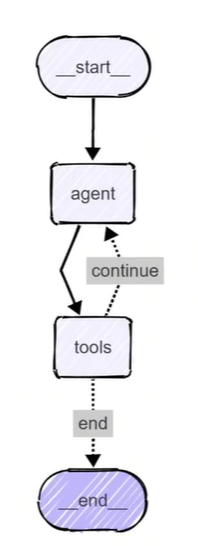